# Bingo! But how long will it take?

It is almost a stereotype to walk into a retirement home and see seniors playing bingo. However, thanks to COVID 19, the game enjoys an unexpected revival among young adults. This week I will play the game for a second time this year with aproximately 80 collegues, most of them logging in remotely from their homes.

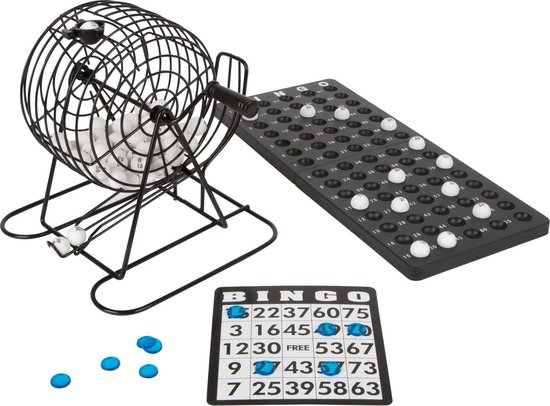

# The game

We will play bingo the classical way, drawing balls from a cage containing 75 balls, numbered 1 through 75. Each player has a bingo card containing 25 squares arranged in 5 rows and 5 columns labelled B-I-N-G-O. The square in the center of the grid is marked 'free', resulting in 24 unique numbers on the card. The objective of this post is to find out how many drawing are required to have a winner.  The winner is the first player who completes all 24 numbers on his card. 

# What are the odds?

We start with a bingo cage containing N balls. We assume that each of n players receives one card containing K numbers generated from a random sample without replacement from the set {1...K}. In our case we have N=75 and K=24.

Let p(x) be the probability that it takes exactly x drawings to complete one bingo card:

$p(x) = \frac{{K\choose K-1} {N-K\choose x-K}} {{N\choose x-1} {N-x+1\choose 1} }$

Let F(x) be the probability that it takes at the most x drawings to complete one bingo card:

$F(x) = $$\sum_{i=K}^{x} p(i)$

Finally, let $F_n(x)$ be the probability that it takes at the most x drawings to complete one out of n bingo cards:

$F_n(x) = 1 - (1 - F(x))^n$

# Results

The results in the table below have been generated by **this** notebook. The  mpmath library takes care of processing some very small probabilities with the adequate level of precision. 

**TABLE HERE**
    
The table shows that when 80 players (bingo cards) participate, a game is likely to take between 60 and 67 drawings (80% confidence). It will be very likely (99% confidence) that a game will take between 56 and 68 drawings. It will be very *un*likely (0.5% probility) that the game will require more than 68 drawings from the cage to complete.




In [1]:
"""
Calculate prob distribution bingo
"""
import mpmath as m
import numpy as np
import pandas as pd
from math import factorial

def binomial(a, b):
    """ Returns the binomial coefficient: number of subsets size b from population size a
    """
    return factorial(a) / (factorial(a - b) * factorial(b))


def prob(x, N=75, K=24):
    """ Returns probabilty of having BINGO after exactly n drawings

    Parameters
    ----------
      x : numer of drawings
      N : total number of bingo balls
      K : number of items on card 
    """
    return ((1 / (N - x + 1)) *
            binomial(K, K - 1) *
            binomial(N - K, x - K) /
            binomial(N, x - 1))


def quantile(s, q):
    """ Return q percent quantile of series s

    Parameters
    ----------
      s : series containing cumulative density probabilities
      q : float specifying quantile
    """
    return s[s >= q].index[0]


In [8]:
N = 75
K = 24

probs = pd.Series([prob(i) for i in range(K, N+1)], index=range(K, N+1)) 
cumprobs = probs.cumsum()

percentiles = [0.01, 0.10, 0.5, 0.9, 0.99]
players = [1, 5, 20, 50, 80, 100, 200, 500, 1000]

output = []
for nplayers in players:
    d = {}
    d['nplayers'] = nplayers
    nitems = len(cumprobs)
    cumprobs_n_players = [np.float(m.fsub(1, m.power( m.fsub(1, cumprobs.values[k], rounding='d'), nplayers), rounding='d')) 
                          for k in range(nitems)]  # uses mpmath for enough precision
    cumprobs_n_players = pd.Series(cumprobs_n_players, index=range(K, N+1))

    cumprobs_n_players = pd.Series(cumprobs_n_players)
    for percentile in percentiles:  
        label = '{:2.0f}%'.format(round(100 * percentile, 0))
        d[label] = quantile(cumprobs_n_players, percentile)
    output.append(d)

outp = pd.DataFrame(output)
outp.set_index('nplayers')


,1%,10%,50%,90%,99%
nplayers,,,,,
1,65,70,74,75,75
5,61,66,70,73,74
20,59,63,67,70,72
50,57,61,65,68,69
80,56,60,64,67,68
100,56,60,64,66,68
200,54,59,62,65,66
500,53,57,60,63,64
1000,52,56,59,61,63


# Conclusion
Assuming 80 employees will participate upcoming Friday, each game is likely (80% probability) to take between 60 and 67 drawings. It will be extrely likely (99% probability) that one game will take between 56 and 68 drawings. It will be extremely unlikely (0.5% probability) that the game will require more than 68 drawings from the cage to complete.